In [1]:
# Download standard packages used in several of the questions in the exam.
import numpy as np
import matplotlib.pyplot as plt

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [2]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.


In [3]:
import sympy as sm
sm.init_printing(use_unicode=True) # sets printing on
# Defining variables;
alpha=sm.symbols('alpha') # parameter for slope in AD - curve
h = sm.symbols('h') # reactionparameter to output in the Central Bank's Taylor Rule
b = sm.symbols('b') # reactionparameter to inflation in the Central Bank's Taylor Rule
phi = sm.symbols('phi') # Slope coefficient in AD - curve
gamma = sm.symbols('gamma') # Slope coefficient in SRAS-Curve
yt = sm.symbols('y_t') # contemporaneous output
yt1 = sm.symbols('y_t-1') # Output last period
pit = sm.symbols('pi_t') # contemporaneous inflation 
pit1 = sm.symbols('pi_t-1') # Inflation last period
vt = sm.symbols('v_t') # Demand schock in period t
st = sm.symbols('s_t') # Supply schock in period t
st1 = sm.symbols('s_t-1') # Supply schock in the previous period t-1




Using Sympy's equation solving function we can solve for the equilibirum values of output $y_t$ and inflation $\pi_t$.

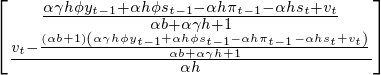

In [4]:
# a defining the AD - curve using equation:
AD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt),pit)

# b. the SRAS - Curve
SRAS = sm.Eq(pit1+gamma*yt-phi*gamma*yt1+st-phi*st1,pit)

# c. Equlizing SRAS and AD
SRASAD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt),pit1+gamma*yt-phi*gamma*yt1+st-phi*st1)

# d. Solve for y
ysol = sm.solve(SRASAD,yt)[0]

# e. Solve for equilbrium inflation by inserting ysol in AD - Curve
pisol = 1/(h*alpha)*(vt-(1+b*alpha)*ysol)

# f. printing results
sm.Matrix([ysol,pisol]) # Prints the equilibrium Output and Inflation in the economy

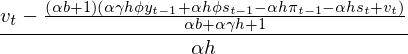

In [5]:
# solving for inflation by inserting ysol in SRAS - curve and see it is the same;
pisol2 = 1/(h*alpha)*(vt-(1+b*alpha)*ysol),pit1+gamma*ysol-phi*gamma*yt1+st-phi*st1
pisol2[0]

In [6]:
# Turn the above solutions into python functions;
ysol_func = sm.lambdify((alpha,gamma,phi,h,b,yt1,st1,pit1,st,vt),ysol)
pisol_func = sm.lambdify((alpha,gamma,phi,h,b,yt1,st1,pit1,st,vt),pisol)


**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

Given the specified parameter values, we can find the equilibrium values of output $\widehat{y}_t$ and inflation $\widehat{\pi}_t$ numerically, by using the above specified python functions.

In [7]:
# Specifies the parametervalues
alpha=5.76
b=0.5
h=0.5
phi=0
gamma= 0.075
yt1=0
pit1=0
vt=0
st=0
st1=0
print(f'analytical solution for market equilibrium Output with v=0 is: {ysol_func(alpha,gamma,phi,h,b,yt1,st1,pit1,st,vt):.2f}')
print(f'analytical solution for market equilibrium inflation with v=0 is: {pisol_func(alpha,gamma,phi,h,b,yt1,st1,pit1,st,vt):.2f}')

analytical solution for market equilibrium Output with v=0 is: 0.00
analytical solution for market equilibrium inflation with v=0 is: 0.00


And we see that the equilibrium output and inflation are $\{(\widehat{y}_t,\widehat{\pi}_t)=(0,0)\}$, which is identical to the long run equilibrium with output being at the structural level $\overline{y}=0$.

However suppose there has been a positive demand shock, i.e. $v_t>0$. Then from standard economic theory and knowing the AS-AD dynamics, we would expect both inflation and output to rise - as a larger demand for the firms goods make firms increase their production. However giving declining marginal productivity of the workers, the firms faces increasing marginal costs and hence increase their prices. Thus both inflation and output in equilibrium increases in period t.

In [8]:
# Defines the parametervalues. Only the demand shock in period t changes.
yt1=0
pit1=0
vt=0.1 # Positive demand shock in period t
st=0
st1=0
print(f'analytical solution for market equilibrium Output with v=0.1 is: {ysol_func(alpha,gamma,phi,h,b,yt1,st1,pit1,st,vt):.2f}')
print(f'analytical solution for market equilibrium inflation with v=0.1 is: {pisol_func(alpha,gamma,phi,h,b,yt1,st1,pit1,st,vt):.5f}')

analytical solution for market equilibrium Output with v=0.1 is: 0.02
analytical solution for market equilibrium inflation with v=0.1 is: 0.00183


The equilibrium with $v_t=0$ and $v_t=0.1$ respectively is visualized below:

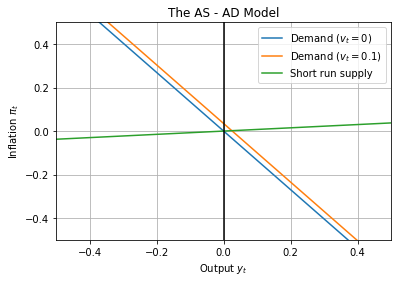

In [9]:
# Specifies the parametervalues
alpha=5.76
b=0.5
h=0.5
phi=0
gamma= 0.075
yt1=0
pit1=0
vt=0
st=0
st1=0
v1t=0.1

ADfunc = lambda yt : 1/(h*alpha)*(vt-(1+b*alpha)*yt) # Defines the AD function using a lambda function.
SRASfunc = lambda yt: pit1+gamma*yt-phi*gamma*yt1+st-phi*st1 # Defines the SRAS function using a lambda function.
ADfunc1 = lambda yt : 1/(h*alpha)*(v1t-(1+b*alpha)*yt) # Defines the AD function using a lambda function.

yt = np.linspace(-5, 5, 200) # Return evenly spaced numbers over a specified interval from -5 to 5 .

# Plot the AD and SRAS - functions
plt.plot(yt, ADfunc(yt),label='Demand ($v_t=0$)') # Plot the AD - function with vt=0
plt.plot(yt, ADfunc1(yt),label='Demand ($v_t=0.1$)') # Plot the AD - function with vt=0.1
plt.plot(yt, SRASfunc(yt), label='Short run supply') # Plot the SRAS - function
plt.legend(loc='upper right') # Place the graph descriptions in the upper right corner
#plt.axhline(y=0,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=0,color='k', label = 'strutural output') # creates a vertical line in the plot at  yt=0 equal to the structural level
plt.xlabel("Output $y_t$ ")
plt.ylabel("Inflation $\pi_t$")
plt.xlim(-0.5,0.5) # Specifies the values for the x-axis
plt.ylim(-0.5,0.5) # speficifes the values for the y-axis
plt.grid()
plt.title('The AS - AD Model')
plt.show()

And as found numerically, the graph shows that the equilibrium changes. The AD - curve shifts to the right and inflation and output increases above their long - run values. In period t+1 when the demand shock ends, the demand curve shift back to its orginal position. However giving that inflation expectations are adaptive, it can be shown that the short - run supply curve will move up in period t+1, because the rising inflation period t affects the inflation expectations upwards. However this will not be shown here. However this will be the objective for the next question.

Below we make a interactive plot showing how the equilibrium changes with $v_t$.

In [12]:
import ipywidgets as widgets # Import a package for interactive plots

def interactive_figure(vt):
    """This function makes a intertive figure with v as a free variable"""
    
    # a. specifies the fixed parameters
    alpha=5.76
    b=0.5
    h=0.5
    phi=0
    gamma= 0.075
    yt1=0
    pit1=0
    st=0
    st1=0
    v1t=0 # Used to specify a AD - function where vt is equal to zero.

    # b. defines the functions for the AD - curve with vt=0, AD - curve with changing vt and the SRAS - Curve
    
    ADfunc = lambda yt : 1/(h*alpha)*(vt-(1+b*alpha)*yt) # Defines the AD function using a lambda function.
    ADfunc1 = lambda yt : 1/(h*alpha)*(v1t-(1+b*alpha)*yt) # Defines the AD function using a lambda function.
    SRASfunc = lambda yt: pit1+gamma*yt-phi*gamma*yt1+st-phi*st1 # Defines the SRAS function using a lambda function.
   
    yt = np.linspace(-5, 5, 200) # Return evenly spaced numbers over a specified interval from -5 to 5 .
    
    # c. plot the figures
    plt.plot(yt, ADfunc(yt),label='Demand') # Plot the AD - function with vt as a free variable
    plt.plot(yt, ADfunc1(yt),label='Demand ($v_t=0$)') # Plot the AD - function with vt=0
    plt.plot(yt, SRASfunc(yt),label='Short run supply') # Plot the SRAS - function
    plt.axvline(x=0,color='k', label='Structural output') # creates a vertical line in the plot at  yt=0 equal to the structural level
    plt.xlim(-0.1,0.1) # Specifies the values for the x-axis
    plt.ylim(-0.3,0.3) # speficifes the values for the y-axis
    plt.xlabel("Output $y_t$ ")
    plt.ylabel("Inflation $\pi_t$")
    plt.grid()
    plt.title('The AS - AD Model')
    plt.legend(loc='upper right') # Place the graph descriptions in the upper right corner
    plt.show()

In [13]:
widgets.interact(interactive_figure,
    vt=widgets.FloatSlider(description="v",min=-5,max=5,step=0.1,value=0.1) # starting value is v_t=0.1
);

interactive(children=(FloatSlider(value=0.1, description='v', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

In [14]:
sm.init_printing(use_unicode=False) # sets printing off

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [43]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

Choose parameters

In [44]:
alpha=5.76
b=0.5
h=0.5
phi=0
gamma= 0.075
yt1=0
pit1=0
st=0
st1=0
delta = 0.8
omega = 0.15
T = 100

To specify the functions for the equilibrium value of $y_t$ and $\pi_t$ in period t, we write up the already found solutions:

$$ \widehat{y}_{t} = \frac{\alpha\cdot h(\gamma\cdot\phi y_{t-1}+\phi\cdot s_{t-1} - \pi_{t-1} - s_t)+v_t}{\alpha(b+\gamma h)+1} $$
and
$$ \widehat{\pi}_{t} = \frac{v_t-\frac{(\alpha b+1)\alpha\cdot h(\gamma\cdot\phi y_{t-1}+\phi\cdot s_{t-1} - \pi_{t-1} - s_t)+v_t}{\alpha(b+\gamma h)+1}}{\alpha h} $$

Define model functions for equilibirum values of $y_t$ and $\pi_t$, vand the AR(1) - processes for demand shocks $v_t$ and supply schocks $s_t$.

In [45]:
y_hat_func = lambda y_hat_lag,v,v_lag,s,s_lag,pi_lag: 1/(alpha*b+alpha*gamma*h+1)*(alpha*h*(gamma*phi*y_hat_lag+phi*s_lag-pi_lag-s)+v)
pi_hat_func = lambda pi_lag,v,v_lag,s,s_lag,y_hat_lag: 1/(alpha*h)*(v-(alpha*b+1)/(alpha*b+alpha*gamma*h+1)*(alpha*h*gamma*phi*y_hat_lag+alpha*h*phi*s_lag-alpha*h*pi_lag-alpha*h*s+v))
v_func = lambda v_lag,x: delta*v_lag + x
s_func = lambda s_lag,c: omega*s_lag + c


Run the simulation

In [46]:
import numpy as np

# a. set setup
np.random.seed(2015)   # set's the random seed.

# b. allocate simulation data

x= np.zeros(T) #returns a numpy array with shape = T filled with zeros
x[0]=0.1 # changes the value of the first element to 0.1
c = np.zeros(T) 
v= np.zeros(T)
#v[0]=0.1
s = np.zeros(T) # Supply shocks is set to be zero in all periods.
y_hat = np.zeros(T) # set equilibrium output/outputgap to be zero.
y_hat[0]=ysol_func(5.76,0.075,0,0.5,0.5,0,0,0,0,0.1) # changes the first element of yhat to be equal to previous found yhat with v=0.1
pi_hat = np.zeros(T)
pi_hat[0]=pisol_func(5.76,0.075,0,0.5,0.5,0,0,0,0,0.1) # changes the first element in pihat to equal the eq. value of pi with v=0.1

# c. run simulation
for t in range(0,T):

    # i. update v and s
    v[t] = v_func(v[t-1],x[t])
    s[t] = s_func(s[t-1],c[t])

    # ii. compute y og pi 
    y_hat[t] = y_hat_func(y_hat[t-1],v[t],v[t-1],s[t],s[t-1],pi_hat[t-1])
    pi_hat[t] = pi_hat_func(pi_hat[t-1],v[t],v[t-1],s[t],s[t-1],y_hat[t-1])

Plot the simulation

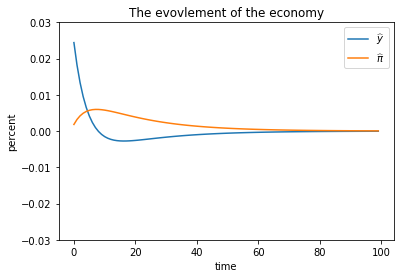

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(y_hat,label='$\\widehat{y}$')
ax.plot(pi_hat,label='$\\widehat{\pi}$')
ax.set_xlabel('time')
ax.set_title('The evovlement of the economy')
ax.set_ylabel('percent')
ax.set_ylim([-0.03,0.03])

ax.legend(loc='upper right');

And as we see, the economy is initially in a equilibrium with a positive output higher than the structural level $\overline{y}=0$ and a positive inflation level higher than the central bank's inflation target level $\pi^{\ast}=0$. However as the shock to $v_t$ drops down to zero again, $x_t=0$ for $\forall x_t>0$, the shock to aggregate demand is reduced yielding a downward drop in the AD - curve. However as the disburtance to aggregate demand $v_t$ is autoregressive, there is some persistent in the shock over time. Moreover as the inflation expectations are adaptive, people will adjust their inflation expectations upwards  in period t+1 as a weighted avaerage of last period inflation and last periods expected inflation due to the high inflation in period t=0. We then see that in subsequent periods, inflation will continue to increase in about roughly 10 periods before it starts to converge towards the long-run equilibirum value of zero. 

Output will however decrease after the initial schock ends due to upward shift in aggregate suppæy and downwards shift in aggregate demand, and output appears to be decreasing in around 10 periods. Thereafter output starts to converge monotically back towards the structural level of zero.



**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [51]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

Choose parameters

In [52]:
sigma_x = par['sigma_x']
sigma_c = par['sigma_c'] 
T = 1000

Run the simulation

In [53]:
import numpy as np

# a. set setup
np.random.seed(2015)   # set's the random seed.

# b. allocate simulation data

x = np.random.normal(loc=0,scale=sigma_x,size=T)
x[0] = 0.1 # set the first element of disburtances to demand to be equal to 0.1 as question 3.
c = np.random.normal(loc=0,scale=sigma_c,size=T)
s = np.zeros(T) # Supply shocks is set to be zero in all periods.
v = np.zeros(T)
y_hat = np.zeros(T) # set equilibrium output/outputgap to be zero.
y_hat[0]=ysol_func(5.76,0.075,0,0.5,0.5,0,0,0,0,0.1) # changes the first element of yhat to be equal to previous found yhat with v=0.1
pi_hat = np.zeros(T)
pi_hat[0]=pisol_func(5.76,0.075,0,0.5,0.5,0,0,0,0,0.1) # changes the first element in pihat to equal the eq. value of pi with v=0.1

# c. run simulation
for t in range(1,T):

    # i. update v and s
    v[t] = v_func(v[t-1],x[t])
    s[t] = s_func(s[t-1],c[t])

    # ii. compute y og pi 
    y_hat[t] = y_hat_func(y_hat[t-1],v[t],v[t-1],s[t],s[t-1],pi_hat[t-1])
    pi_hat[t] = pi_hat_func(pi_hat[t-1],v[t],v[t-1],s[t],s[t-1],y_hat[t-1])


Plot the simulation

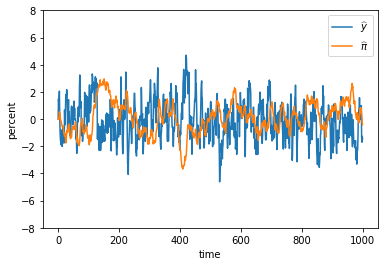

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(y_hat,label='$\\widehat{y}$')
ax.plot(pi_hat,label='$\\widehat{\pi}$')
ax.set_xlabel('time')

ax.set_ylabel('percent')
ax.set_ylim([-8,8])

ax.legend(loc='upper right');

We see that the introduction of stochastic shocks results in more variation in the outputgap and inflationgap, and the smooth convergence back to the long rund equilibrium is vanished.

Below we calculate the five statistics:

0. mean of $y_t$, $var(y_t)$
1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [55]:
# a. mean using numpy's function mean
ymean = np.mean(y_hat)
pimean = np.mean(pi_hat)

# b. variance of y and pi using numpy's function var
yvar = np.var(y_hat)
pivar = np.var(pi_hat)

# c. Correlation between y and py using numpy's function correlate
piycorr = np.corrcoef(y_hat,pi_hat)

# d. Auto-correlation between y_t and y_t-1, and pi_t and pi_t-1 using numpy's function corecoef
# ??? - se below for alternative solution;

# e. print results
print(f'0.1 The mean of output is: {ymean:.2f}')
print(f'0.2 The mean of inflation is: {pimean:.2f}')
print(f'1. The variance of output is: {yvar:.2f}')
print(f'2. The variance of inflation is: {pivar:.2f}')
print(f'3. The correlation between output and inflation are: {piycorr[0][1]:.2f}')
print(f'4. The Auto-correlation between output and output last period is: ???:')
print(f'5. The Auto-correlation between inflation and inflation last period is: ???')

0.1 The mean of output is: -0.10
0.2 The mean of inflation is: 0.08
1. The variance of output is: 1.98
2. The variance of inflation is: 1.31
3. The correlation between output and inflation are: -0.23
4. The Auto-correlation between output and output last period is: ???:
5. The Auto-correlation between inflation and inflation last period is: ???


We are not quite sure how to calculate the Auto - Correlations $corr(y_t,y_{t-1})$ and $corr(\pi_t,\pi_{t-1})$ using well known functions from numpy. However using the tsaplots from the statsmodels.graphics package and tatsmodels.tsa.stattools.acf() , we have both plottet the autocorrelation and calculated it for $y_t$ and $\pi_t$ below:

Text(0.5, 1.0, 'Autocorrelation in $\\pi_t$')

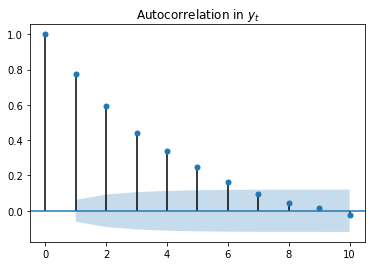

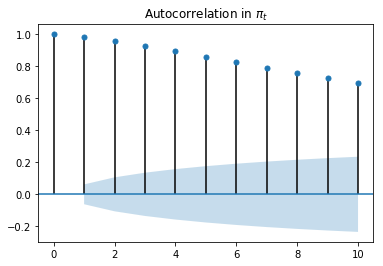

In [56]:

from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf 


# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(y_hat, lags=10)
plt.title('Autocorrelation in $y_t$')

fig2 = tsaplots.plot_acf(pi_hat, lags=10)
plt.title('Autocorrelation in $\pi_t$')


And visually we can see that the autocorrelation between output this period and last period is a little below 0.8, while the autocorrelation for inflation almost 1 (a little below - perhaps between 0.97-0.99).

The autocorrelations calculated:

In [57]:
#a. Auto-corr betwen y_t and y_t-1
yautocorr = acf(y_hat,nlags=10) # nlags specifies the number of lags, we are only interested in the first

#b. Auto-corr betwen pi_t and pi_t-1
piautocorr = acf(pi_hat,nlags=10)

# So the autocorrelations are calcualted as:
print(f'4. The Auto-correlation between output and output last period is: {yautocorr[1]:.2f}')
print(f'5. The Auto-correlation between inflation and inflation last period is: {piautocorr[1]:.2f}')

4. The Auto-correlation between output and output last period is: 0.78
5. The Auto-correlation between inflation and inflation last period is: 0.98


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

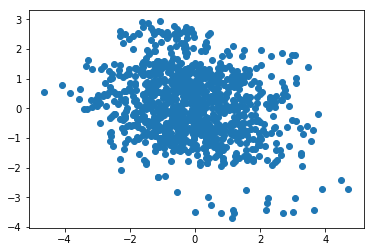

In [27]:
plt.scatter(y_hat,pi_hat)

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [7]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?